In [1]:
import os
import sys

os.environ["PYSPARK_PYTHON"]="C:\Spark\spark-3.3.2-bin-hadoop2\python"
os.environ["JAVA_HOME"] = "C:\Program Files\Java\jdk-18.0.2.1"
os.environ["SPARK_HOME"] = "C:\Spark\spark-3.3.2-bin-hadoop2"
os.environ["PYLIB"] = os.environ["SPARK_HOME"] + "/python/lib"
sys.path.insert(0, os.environ["PYLIB"] + "/py4j-0.10.9.5-src.zip")
sys.path.insert(0, os.environ["PYLIB"] + "/pyspark.zip")

MAX_MEMORY = "14G"
from pyspark.sql import SparkSession
spark = SparkSession \
    .builder \
    .appName("bicluster_predict") \
    .config("spark.driver.memory", MAX_MEMORY) \
    .getOrCreate()    
spark

In [147]:
import random
import numpy as np

# Set seed value for reproducibility
seed_value = 42
random.seed(seed_value)
np.random.seed(seed_value)

In [2]:
import pandas as pd

pd.set_option('display.max_columns', None)

In [3]:
model_data = spark.read.option("header","true").option("inferSchema","true").csv("../data/EDA/final_data_for_modelling.csv")
model_data = model_data.drop("_c0")
model_data.printSchema()
model_data.count()

root
 |-- age_imputed: double (nullable = true)
 |-- bg2_lactate_imputed: double (nullable = true)
 |-- basophils_imputed: double (nullable = true)
 |-- eosinophils_imputed: double (nullable = true)
 |-- lymphocytes_imputed: double (nullable = true)
 |-- monocytes_imputed: double (nullable = true)
 |-- neutrophils_imputed: double (nullable = true)
 |-- albumin_imputed: double (nullable = true)
 |-- aniongap_imputed: double (nullable = true)
 |-- bicarbonate_imputed: double (nullable = true)
 |-- bun_imputed: double (nullable = true)
 |-- calcium_imputed: double (nullable = true)
 |-- chloride_imputed: double (nullable = true)
 |-- creatinine_imputed: double (nullable = true)
 |-- glucose_imputed: double (nullable = true)
 |-- sodium_imputed: double (nullable = true)
 |-- potassium_imputed: double (nullable = true)
 |-- inr_imputed: double (nullable = true)
 |-- pt_imputed: double (nullable = true)
 |-- ptt_imputed: double (nullable = true)
 |-- hematocrit_imputed: double (nullable = tr

63887

In [13]:
model_data.describe().toPandas()

summary        age_imputed bg2_lactate_imputed    basophils_imputed  \
0   count              63887               63887                63887   
1    mean  56.82400472709635  1.6618992909350772  0.41085979933311007   
2  stddev  19.28094185711831  0.4508023009295065   0.1788947775643359   
3     min               18.0                 0.2                  0.0   
4     max              98.51                 4.8                  1.2   

  eosinophils_imputed lymphocytes_imputed   monocytes_imputed  \
0               63887               63887               63887   
1  1.4472944417484328  20.265802119371077   6.036700737237932   
2  0.9596238678234628   7.209200043293772  1.8055899982717172   
3                 0.0                 0.0                 0.0   
4                 6.5                50.8                14.6   

  neutrophils_imputed      albumin_imputed    aniongap_imputed  \
0               63887                63887               63887   
1   72.54882370435301     3.87397749150817  14.322600842111854   
2   8.391445135120653  0.31142223482013737   2.620848637811744   
3                35.8                  1.8                 7.0   
4               100.0                  5.3                23.0   

  bicarbonate_imputed         bun_imputed     calcium_imputed  \
0               63887               63887               63887   
1  26.913957456133485  15.669588492181507   8.975599104669197   
2    2.84769779209311    6.63918448886357  0.4988295388939287   
3                19.0                 1.0                 7.4   
4                35.0                44.0                10.6   

     chloride_imputed   creatinine_imputed     glucose_imputed  \
0               63887                63887               63887   
1  104.77735689576909   0.8803982030773086  123.04590918340195   
2  3.5586840240888145  0.23859787593365506   34.05988039237201   
3                93.0                  0.2                31.0   
4               117.0                  1.9               250.0   

       sodium_imputed   potassium_imputed          inr_imputed  \
0               63887               63887                63887   
1  140.30140717203813  4.2118255670167315    1.131154381955504   
2  2.7373925256555154  0.4172687362614883  0.12710702741208696   
3               133.0                 3.0                  0.8   
4               149.0                 5.7                  1.8   

           pt_imputed         ptt_imputed hematocrit_imputed  \
0               63887               63887              63887   
1  12.685094463662445  29.783426988275597  37.57769029693053   
2  1.3522042469266147  4.2842548656152895  4.668777216754638   
3                 8.5                17.3               22.7   
4                21.0                57.4               51.0   

   hemoglobin_imputed         mch_imputed        mchc_imputed  \
0               63887               63887               63887   
1  12.582841579664079   30.44813811886616   33.90112385931408   
2  1.6635514293713345  1.8779988531436738  1.2828829790201643   
3                 7.3                25.1                30.1   
4                17.2                35.8                37.6   

         mcv_imputed    platelet_imputed         rbc_imputed  \
0              63887               63887               63887   
1  90.68909793854776  245.37486499600857   4.175787405888535   
2  5.106900334736286   74.09647661291679  0.5615584317045133   
3               75.0                17.0                 2.4   
4              107.0               484.0                5.79   

          rdw_imputed         wbc_imputed      scr_min_imputed ckd_imputed  \
0               63887               63887                63887       63887   
1    13.6252257892843   9.807813170128496   0.8803982030773086         0.0   
2  1.1028047370996332  3.8156606614514987  0.23859787593365506         0.0   
3                10.6                 0.9                  0.2         0.0   
4                18.1                22

In [4]:
import pyspark.sql.functions as F
model_data = model_data.withColumn("gender_imputed", F.when(F.col("gender") == 'M', 1) \
                           .when(F.col("gender") == 'F', 2) \
                           .otherwise(0))
model_data.groupby("gender_imputed").count().toPandas()

gender_imputed  count
0               1  29404
1               2  34483

In [5]:
# Splitting the data into train and test (Remember you are expected to compare the model later)
train, test = model_data.randomSplit([0.7,0.3])
print("Size of training data {0}".format(train.count()))
print("Size of test data {0}".format(test.count()))

Size of training data 44866
Size of test data 19021


Certainly! In addition to the biclustering algorithms mentioned earlier, here are a few more biclustering algorithms that you can consider:

Biclustering by Direct Maximization: This algorithm aims to find the optimal biclusters by directly maximizing a biclustering quality criterion, such as the sum of squared residuals or the log-likelihood.

Cheng and Church Biclustering: This algorithm utilizes a greedy search approach to identify biclusters based on the correlation between rows and columns.

BiMax: BiMax is a combinatorial optimization-based biclustering algorithm that iteratively expands and merges biclusters.

ISA (Iterative Signature Algorithm): ISA is an iterative biclustering algorithm that identifies coherent patterns in the form of "signatures" by iteratively updating the rows and columns of the data matrix.

Plaid: Plaid is a pattern-based biclustering algorithm that identifies additive biclusters, where the values of the bicluster can be obtained by adding up the values of selected rows and columns.

what I need is cluster columns by covriance and rows by distance/mean

In [152]:
import numpy as np
from sklearn.cluster import SpectralBiclustering

def cheng_church_biclustering(data, n_clusters_row, n_clusters_column):
    model = SpectralBiclustering(n_clusters=(n_clusters_row, n_clusters_column), random_state=0)
    model.fit(data)
    
    row_cluster_assignments = model.row_labels_
    column_cluster_assignments = model.column_labels_
    
    return row_cluster_assignments, column_cluster_assignments


In [155]:
# Example usage
data = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
n_clusters_row = 5
n_clusters_column = 5

row_cluster_assignments, column_cluster_assignments = cheng_church_biclustering(X_train, n_clusters_row, n_clusters_column)

print("Row Cluster Assignments:", row_cluster_assignments)
print("Column Cluster Assignments:", column_cluster_assignments)


C:\Users\snksh\anaconda3\lib\site-packages\sklearn\cluster\_bicluster.py:33: RuntimeWarning: divide by zero encountered in true_divide
  col_diag = np.asarray(1.0 / np.sqrt(X.sum(axis=0))).squeeze()
C:\Users\snksh\anaconda3\lib\site-packages\sklearn\cluster\_bicluster.py:42: RuntimeWarning: invalid value encountered in multiply
  an = row_diag[:, np.newaxis] * X * col_diag


ValueError: array must not contain infs or NaNs

In [76]:
from sklearn.cluster import SpectralBiclustering

model = SpectralBiclustering(n_clusters=(5,5), random_state=0)
model.fit(X_train)

SpectralBiclustering(n_clusters=(5, 5), random_state=0)

In [6]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.cluster import SpectralBiclustering
from sklearn.metrics import consensus_score

In [8]:
# data transfo
feature_cols =  model_data.columns
feature_cols.remove("charlson_comorbidity_index_imputed")
feature_cols.remove("gender")
#feature_cols.append("gender_imputed")
print(feature_cols)


['age_imputed', 'bg2_lactate_imputed', 'basophils_imputed', 'eosinophils_imputed', 'lymphocytes_imputed', 'monocytes_imputed', 'neutrophils_imputed', 'albumin_imputed', 'aniongap_imputed', 'bicarbonate_imputed', 'bun_imputed', 'calcium_imputed', 'chloride_imputed', 'creatinine_imputed', 'glucose_imputed', 'sodium_imputed', 'potassium_imputed', 'inr_imputed', 'pt_imputed', 'ptt_imputed', 'hematocrit_imputed', 'hemoglobin_imputed', 'mch_imputed', 'mchc_imputed', 'mcv_imputed', 'platelet_imputed', 'rbc_imputed', 'rdw_imputed', 'wbc_imputed', 'scr_min_imputed', 'ckd_imputed', 'mdrd_est_imputed', 'scr_baseline_imputed', 'alt_imputed', 'alp_imputed', 'ast_imputed', 'bilirubin_total_imputed', 'gender_imputed']


In [9]:
X_train = train.select([c for c in feature_cols]).toPandas()
X_test = test.select([c for c in feature_cols]).toPandas()

In [144]:
X = model_data.select([c for c in feature_cols]).toPandas()
y = model_data.select("charlson_comorbidity_index_imputed").toPandas()

In [10]:
y_train = train.select("charlson_comorbidity_index_imputed").toPandas()
y_test = test.select("charlson_comorbidity_index_imputed").toPandas()

In [156]:
n_clusters_row = 2
n_clusters_column = 2
model_bi = SpectralBiclustering(n_clusters=(n_clusters_row, n_clusters_column), method="bistochastic", random_state=0)
model_bi.fit(X_train)
print(model_bi.row_labels_)
print(model_bi.column_labels_)
print(np.argsort(model_bi.row_labels_))
print(np.argsort(model_bi.column_labels_))

C:\Users\snksh\anaconda3\lib\site-packages\sklearn\cluster\_bicluster.py:33: RuntimeWarning: divide by zero encountered in true_divide
  col_diag = np.asarray(1.0 / np.sqrt(X.sum(axis=0))).squeeze()
C:\Users\snksh\anaconda3\lib\site-packages\sklearn\cluster\_bicluster.py:42: RuntimeWarning: invalid value encountered in multiply
  an = row_diag[:, np.newaxis] * X * col_diag


ValueError: array must not contain infs or NaNs

In [151]:
n_clusters_row = 2
n_clusters_column = 2
model_bi = SpectralBiclustering(n_clusters=(n_clusters_row, n_clusters_column), method="bistochastic", random_state=0)
model_bi.fit(X_train)
print(model_bi.row_labels_)
print(model_bi.column_labels_)
print(np.argsort(model_bi.row_labels_))
print(np.argsort(model_bi.column_labels_))

[1 1 1 ... 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0
 0]
[22432 26935 26933 ... 27399 27397     0]
[ 0 35 34 33 30 28 27 25 24 23 22 19 36 17 16 18 14  1  2  3  4  5  6 15
  7 37  9 10 12  8 21 29 20 31 32 11 13 26]


In [103]:
# Filter data belonging to each row cluster
for cluster_id in range(n_clusters_row):
    cluster_rows = X_train[model_bi.row_labels_ == cluster_id]
    print(f"Data in Row Cluster {cluster_id}:")
    print(cluster_rows.index)



Data in Row Cluster 0:
Int64Index([    0,     1,     2,     3,     5,     6,     7,     9,    11,
               12,
            ...
            44843, 44844, 44847, 44848, 44849, 44853, 44857, 44858, 44860,
            44864],
           dtype='int64', length=24051)
Data in Row Cluster 1:
Int64Index([    4,     8,    10,    17,    19,    22,    28,    33,    34,
               36,
            ...
            44851, 44852, 44854, 44855, 44856, 44859, 44861, 44862, 44863,
            44865],
           dtype='int64', length=20815)


In the above code, the number of clusters is specified separately for rows and columns. The variable n_clusters_row represents the desired number of clusters for the rows, and n_clusters_column represents the desired number of clusters for the columns.

So, in total, there are n_clusters_row clusters in the row dimension and n_clusters_column clusters in the column dimension.

For example, if you set n_clusters_row = 2 and n_clusters_column = 3, the algorithm will aim to identify 2 clusters in the row dimension and 3 clusters in the column dimension.

The total number of clusters would be the product of n_clusters_row and n_clusters_column, which represents the number of possible combinations of row and column clusters.

It's important to note that the actual number of clusters identified by the algorithm may vary based on the data and the underlying patterns present in it.

In [105]:
# Filter data belonging to each column cluster
for cluster_id in range(n_clusters_column):
    cluster_columns = X_train.T[model_bi.column_labels_ == cluster_id]
    print(f"Data in Column Cluster {cluster_id}:")
    print(cluster_columns.index.tolist())

Data in Column Cluster 0:
['age_imputed', 'bg2_lactate_imputed', 'neutrophils_imputed', 'bicarbonate_imputed', 'bun_imputed', 'chloride_imputed', 'glucose_imputed', 'potassium_imputed', 'inr_imputed', 'pt_imputed', 'ptt_imputed', 'mch_imputed', 'mchc_imputed', 'mcv_imputed', 'rdw_imputed', 'wbc_imputed', 'ckd_imputed', 'alt_imputed', 'alp_imputed', 'ast_imputed', 'bilirubin_total_imputed']
Data in Column Cluster 1:
['creatinine_imputed', 'hematocrit_imputed', 'hemoglobin_imputed', 'rbc_imputed', 'scr_min_imputed', 'mdrd_est_imputed', 'scr_baseline_imputed']
Data in Column Cluster 2:
['basophils_imputed', 'eosinophils_imputed', 'lymphocytes_imputed', 'monocytes_imputed', 'albumin_imputed', 'aniongap_imputed', 'calcium_imputed', 'sodium_imputed', 'platelet_imputed', 'gender_imputed']


In [143]:
model_bi.predict(X_test)

AttributeError: 'SpectralBiclustering' object has no attribute 'predict'

Apologies for the confusion. You are correct that the SpectralBiclustering class in scikit-learn does not have a predict method. Spectral biclustering does not inherently support predicting cluster assignments for new data points.

Unlike traditional clustering algorithms, spectral biclustering is specifically designed for identifying biclusters in a given dataset. It aims to find subgroups of rows and columns that exhibit coherent behavior or relationships within the given dataset. It does not provide a straightforward way to predict cluster assignments for new, unseen data points.

If you have new data points and you want to assign them to existing biclusters, you would need to apply the same spectral biclustering algorithm to the combined dataset (original data + new data) and then examine the resulting biclusters to determine the assignment of the new data points.

Alternatively, if your goal is to perform clustering on new, unseen data points, you might consider using a traditional clustering algorithm such as K-means, DBSCAN, or hierarchical clustering, which are better suited for that task.

I apologize for the confusion caused, and I hope this clarification helps.

Predicting biclusters on unseen data is not a straightforward task because biclustering algorithms are typically designed to identify patterns and structures within a specific dataset. Biclustering algorithms, including spectral biclustering, are not directly applicable to predicting biclusters on new, unseen data.

However, if you have a trained biclustering model and want to determine how new data points would fit into the existing biclusters, you can follow a two-step approach:

Retraining: Combine the original data with the new data points and retrain the biclustering model on the combined dataset. This step ensures that the model captures the patterns and structures in the expanded dataset.

Analyzing Biclusters: Once the model is retrained, you can examine the resulting biclusters to understand how the new data points are assigned. You can compare the cluster memberships or patterns in the original biclusters to the patterns in the retrained biclusters to determine the closest matching biclusters for the new data.

It's important to note that the retraining step might affect the existing biclusters, and the interpretation of biclusters may change due to the introduction of new data points. Therefore, it is crucial to carefully analyze and interpret the results.

Please keep in mind that the success of this approach depends on the specific biclustering algorithm, the nature of the data, and the relationships between the original and new data. It's recommended to consult the documentation of the biclustering algorithm you are using or explore alternative approaches for clustering or pattern discovery on new, unseen data.





Regenerate response

In [138]:
from sklearn.linear_model import LinearRegression
#X_t_c = X_train.copy()
#X_t_c["charlson_comorbidity_index"] = y_train
#X_test["charlson_comorbidity_index"] = y_test
y_train_res =  []
y_train_res_predict =  []
y_test_res =  []
y_test_res_predict =  []
for i in range(n_clusters_row):
    cluster_rows = X_train[model_bi.row_labels_ == i]
    for j in range(n_clusters_column):
        print(i, j)
        rows_t = cluster_rows.T[model_bi.column_labels_ == j]
        #cluster_cols = cluster_columns.index.tolist()
        #rs = 
        
        X_tr = rows_t.T #cluster_rows[:, cluster_cols] #X_train.loc[X_train.cluster == i]
        print(X_tr)
        y_tr_t = y_train[model_bi.row_labels_ == i] #cluster_rows.charlson_comorbidity_index.values
        print(y_tr_t)
        y_tr = y_tr_t.charlson_comorbidity_index_imputed.values #   [:, 1]
        print(y_tr)
       # X_t = X_test.loc[X_test.cluster == i]
       # y_t = X_t.charlson_comorbidity_index.values
        #print(X_t)
        regr = LinearRegression()
        model = regr.fit(X_tr, y_tr)
        y_train_predict = model.predict(X_tr)
       # y_test_predict = model.predict(X_t)
        #print(regr.score(X_t, y_t))
        y_train_res.extend(y_tr)
        y_train_res_predict.extend(y_train_predict)
       # y_test_res.extend(y_t)
       # y_test_res_predict.extend(y_test_predict)

0 0
       age_imputed  bg2_lactate_imputed  neutrophils_imputed  \
0        -2.011076            -0.138987            -2.197302   
1        -2.010557            -1.248694             1.234657   
2        -2.009001            -0.138987            -1.100982   
3        -2.006406            -0.582869             1.091659   
5        -2.005887            -0.138987            -0.385990   
...            ...                  ...                  ...   
44853     1.864096            -0.138987             0.054921   
44857     1.881741            -0.138987             0.054921   
44858     1.897829            -0.138987             0.054921   
44860     1.930006            -0.138987             0.305168   
44864     2.072204            -0.138987             0.495832   

       bicarbonate_imputed  bun_imputed  chloride_imputed  glucose_imputed  \
0                 0.380965    -0.853578          0.346910        -0.970101   
1                -0.321962    -0.853578          0.066439        -0.117

In [139]:
print(y_train_res)

[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 6.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

In [140]:
print(y_train_res_predict)

[-1.0335099387965738, -0.9801496328398316, -1.02041959201016, -0.7108527604477541, -0.7866629561468454, -0.6990363979266729, -0.8916488466721324, -0.8745101804838487, -0.48928504699623687, -0.7365929330904919, -0.9122816675542227, -0.6637046159515796, -1.2801401243483626, -0.7627779747899925, -0.6751609976178452, -0.9588861348270297, -0.8196055820360324, -0.80376891424907, -0.9229486965503226, -0.8922569866297474, -0.6611084801008698, -0.9530922038625653, -0.36213997331179826, -0.6491629361683642, -0.7161111029674303, -1.038123129168898, -1.0326167130501114, -1.2110839170503258, -1.0461704760327746, -1.0443651812766679, -0.5592714267789769, -0.8861037039638502, -0.9018228300211142, -0.8950171689392774, -0.8145646225261949, -0.729611538198077, -0.9355015285165424, -0.9226978140971012, -0.9894997776073708, -0.9712573149547885, -0.47177204196285594, -0.8344121950994268, -1.10165399075458, -0.9589745421412714, -0.685375603380102, -1.1844593753127701, -0.7171273007826047, -0.386396618100412

In [141]:
print(len(y_train_res))
print(len(y_train_res_predict))

134598
134598


In [142]:
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_train_res, y_train_res_predict), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_train_res, y_train_res_predict), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_train_res, y_train_res_predict), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_train_res, y_train_res_predict), 2)) 
print("R2 score =", round(sm.r2_score(y_train_res, y_train_res_predict), 2))

Mean absolute error = 1.55
Mean squared error = 4.3
Median absolute error = 1.23
Explain variance score = 0.33
R2 score = 0.33


In [110]:
X_train = X_train.drop("charlson_comorbidity_index", axis=1)

Text(0.5, 1.0, 'structure of rearranged data')

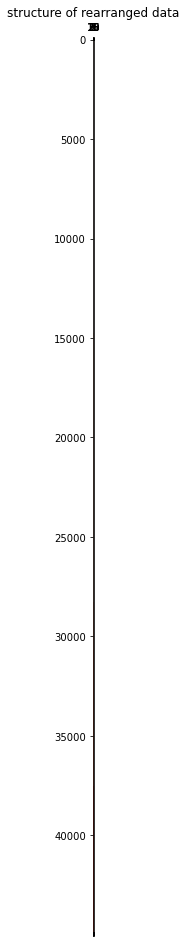

In [82]:
plt.matshow(
    np.outer(np.sort(model_bi.row_labels_) + 1, np.sort(model_bi.column_labels_) + 1),
    cmap=plt.cm.Reds,
)
plt.title("structure of rearranged data")

In [52]:
import numpy as np
from sklearn.cluster import KMeans

def bicluster_kmeans(data, n_clusters_row, n_clusters_column):
    # Apply K-means clustering along rows
    kmeans_row = KMeans(n_clusters=n_clusters_row, random_state=0)
    row_cluster_assignments = kmeans_row.fit_predict(data)

    # Apply K-means clustering along columns
    kmeans_column = KMeans(n_clusters=n_clusters_column, random_state=0)
    column_cluster_assignments = kmeans_column.fit_predict(data.T)

    return row_cluster_assignments, column_cluster_assignments

In [54]:
# Example usage
data = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
n_clusters_row = 3
n_clusters_column = 3

row_cluster_assignments, column_cluster_assignments = bicluster_kmeans(data, n_clusters_row, n_clusters_column)

print("Row Cluster Assignments:", row_cluster_assignments)
print("Column Cluster Assignments:", column_cluster_assignments)

Row Cluster Assignments: [0 2 1]
Column Cluster Assignments: [0 2 1]


In [55]:
import numpy as np
from sklearn.cluster import KMeans

def bicluster_joint_kmeans(data, n_clusters_row, n_clusters_column, max_iterations=100):
    n_rows, n_columns = data.shape
    
    # Initialize row and column cluster assignments randomly
    row_cluster_assignments = np.random.randint(0, n_clusters_row, size=n_rows)
    column_cluster_assignments = np.random.randint(0, n_clusters_column, size=n_columns)
    
    for iteration in range(max_iterations):
        # Update row cluster centroids
        row_cluster_centroids = np.zeros((n_clusters_row, n_columns))
        
        for k in range(n_clusters_row):
            mask = (row_cluster_assignments == k)
            row_cluster_centroids[k] = np.mean(data[mask], axis=0)
        
        # Update column cluster centroids
        column_cluster_centroids = np.zeros((n_clusters_column, n_rows))
        
        for k in range(n_clusters_column):
            mask = (column_cluster_assignments == k)
            column_cluster_centroids[k] = np.mean(data.T[mask], axis=0)
        
        # Assign row clusters based on column cluster centroids
        row_cluster_assignments = np.argmin(np.abs(row_cluster_centroids[:, np.newaxis, :] - data), axis=0)
        
        # Assign column clusters based on row cluster centroids
        column_cluster_assignments = np.argmin(np.abs(column_cluster_centroids[:, np.newaxis, :] - data.T), axis=0)
    
    return row_cluster_assignments, column_cluster_assignments


In this updated implementation, the bicluster_joint_kmeans function performs a joint clustering approach by iteratively updating the row and column cluster assignments based on the centroids of the opposite dimension.

During each iteration, the row cluster centroids are computed as the mean of the data points assigned to each row cluster. Similarly, the column cluster centroids are computed as the mean of the data points assigned to each column cluster.

Next, the row cluster assignments are updated by finding the nearest row cluster centroid for each data point based on the absolute differences. Similarly, the column cluster assignments are updated by finding the nearest column cluster centroid for each data point based on the absolute differences.

These steps are repeated for a specified number of iterations (max_iterations), allowing the row and column clusters to influence each other during the clustering process.

To use this updated implementation, you can call the bicluster_joint_kmeans function with your data matrix, the desired number of clusters for rows and columns, and optionally specify the maximum number of iterations. Here's an example usage:

In [64]:
# Example usage
data = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
n_clusters_row = 2
n_clusters_column = 2

row_cluster_assignments, column_cluster_assignments = bicluster_joint_kmeans(data, n_clusters_row, n_clusters_column)

print("Row Cluster Assignments:", row_cluster_assignments)
print("Column Cluster Assignments:", column_cluster_assignments)


Row Cluster Assignments: [[0 0 0]
 [0 1 1]
 [1 1 1]]
Column Cluster Assignments: [[1 1 1]
 [1 1 1]
 [1 1 1]]


In this example, the bicluster_joint_kmeans function is called with a 3x3 data matrix, and the desired number of clusters for rows and columns is set to 2. The row and column cluster assignments are then printed to observe the resulting biclustering structure influenced by the joint clustering approach.

In [65]:
# Example usage
data = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
n_clusters_row = 2
n_clusters_column = 2

row_cluster_assignments, column_cluster_assignments = bicluster_joint_kmeans(data, n_clusters_row, n_clusters_column)

# Filter rows belonging to each row cluster
for cluster_id in range(n_clusters_row):
    cluster_rows = data[row_cluster_assignments == cluster_id]
    print(f"Rows in Cluster {cluster_id}:")
    print(cluster_rows)

# Filter columns belonging to each column cluster
for cluster_id in range(n_clusters_column):
    cluster_columns = data[column_cluster_assignments == cluster_id]
    print(f"Columns in Cluster {cluster_id}:")
    print(cluster_columns)


Rows in Cluster 0:
[1 2 3 4 5 6 7 8 9]
Rows in Cluster 1:
[]
Columns in Cluster 0:
[3 5 6 8 9]
Columns in Cluster 1:
[1 2 4 7]


The reason for specifying separate numbers of clusters for rows and columns is to capture different patterns and structures in the data along each dimension independently. Biclustering aims to identify subsets of rows and columns that exhibit coherent behavior or relationships, and allowing different numbers of clusters for rows and columns enables the algorithm to capture potentially different patterns in each dimension.

By using different numbers of clusters for rows and columns, the biclustering algorithm can identify distinct subgroups or coherent patterns in both the row and column dimensions simultaneously. This flexibility allows for a more comprehensive analysis of the data, as it can uncover different aspects of the underlying structure that may not be apparent when considering rows and columns together as a single entity.

In certain datasets, it is possible that the number of clusters in rows and columns can be the same, indicating similar structures or patterns in both dimensions. However, providing the flexibility to specify different numbers of clusters allows for a more versatile and expressive biclustering approach that can capture a wider range of data patterns.

In [69]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
to_scale = [col for col in X_train.columns.values]
#to_scale.remove("cluster")
#to_scale.remove("gender_imputed")
print(to_scale)

scaler.fit(X_train[to_scale])

X_train[to_scale] = scaler.transform(X_train[to_scale])

# predict z-scores on the test set
X_test[to_scale] = scaler.transform(X_test[to_scale])

['age_imputed', 'bg2_lactate_imputed', 'basophils_imputed', 'eosinophils_imputed', 'lymphocytes_imputed', 'monocytes_imputed', 'neutrophils_imputed', 'albumin_imputed', 'aniongap_imputed', 'bicarbonate_imputed', 'bun_imputed', 'calcium_imputed', 'chloride_imputed', 'creatinine_imputed', 'glucose_imputed', 'sodium_imputed', 'potassium_imputed', 'inr_imputed', 'pt_imputed', 'ptt_imputed', 'hematocrit_imputed', 'hemoglobin_imputed', 'mch_imputed', 'mchc_imputed', 'mcv_imputed', 'platelet_imputed', 'rbc_imputed', 'rdw_imputed', 'wbc_imputed', 'scr_min_imputed', 'ckd_imputed', 'mdrd_est_imputed', 'scr_baseline_imputed', 'alt_imputed', 'alp_imputed', 'ast_imputed', 'bilirubin_total_imputed', 'gender_imputed']


In [70]:
row_cluster_assignments, column_cluster_assignments = bicluster_joint_kmeans(X_train, n_clusters_row, n_clusters_column)
n_clusters_row = 3
n_clusters_column = 3
# Filter rows belonging to each row cluster
for cluster_id in range(n_clusters_row):
    cluster_rows = X_train[row_cluster_assignments == cluster_id]
    print(f"Rows in Cluster {cluster_id}:")
    print(cluster_rows)

# Filter columns belonging to each column cluster
for cluster_id in range(n_clusters_column):
    cluster_columns = X_train[column_cluster_assignments == cluster_id]
    print(f"Columns in Cluster {cluster_id}:")
    print(cluster_columns)


ValueError: Unable to coerce to Series/DataFrame, dimension must be <= 2: (2, 1, 38)

In [32]:
import numpy as np

def initialize_biclusters(data, n_clusters):
    n_samples, n_features = data.shape
    row_cluster_indicator = np.zeros((n_samples, n_clusters))
    col_cluster_indicator = np.zeros((n_features, n_clusters))
    
    # Randomly initialize row and column cluster indicators
    for k in range(n_clusters):
        random_row = np.random.choice(range(n_samples))
        random_col = np.random.choice(range(n_features))
        row_cluster_indicator[random_row, k] = 1
        col_cluster_indicator[random_col, k] = 1
    
    return row_cluster_indicator, col_cluster_indicator

def update_biclusters(data, row_cluster_indicator, col_cluster_indicator):
    n_samples, n_features = data.shape
    n_clusters = row_cluster_indicator.shape[1]
    
    updated_row_cluster_indicator = np.zeros_like(row_cluster_indicator)
    updated_col_cluster_indicator = np.zeros_like(col_cluster_indicator)
    
    for k in range(n_clusters):
        # Calculate row and column sums for the current cluster
        row_sum = data.dot(col_cluster_indicator[:, k])
        col_sum = row_cluster_indicator[:, k].dot(data)
        
        # Normalize the row and column sums
        row_sum_norm = row_sum / np.sum(row_sum)
        col_sum_norm = col_sum / np.sum(col_sum)
        
        # Update the row and column cluster indicators based on the normalized sums
        updated_row_cluster_indicator[:, k] = (row_sum_norm >= np.mean(row_sum_norm)).astype(int)
        updated_col_cluster_indicator[:, k] = (col_sum_norm >= np.mean(col_sum_norm)).astype(int)
    
    return updated_row_cluster_indicator, updated_col_cluster_indicator

def run_isa(data, n_clusters, n_iterations):
    row_cluster_indicator, col_cluster_indicator = initialize_biclusters(data, n_clusters)
    
    for i in range(n_iterations):
        row_cluster_indicator, col_cluster_indicator = update_biclusters(data, row_cluster_indicator, col_cluster_indicator)
    
    return row_cluster_indicator, col_cluster_indicator

# Example usage
data = np.array([[1, 0, 1, 0, 1],
                 [0, 1, 0, 1, 0],
                 [1, 1, 0, 0, 1],
                 [0, 1, 1, 1, 0]])

n_clusters = 3
n_iterations = 10

row_cluster_indicator, col_cluster_indicator = run_isa(data, n_clusters, n_iterations)

print("Row Cluster Indicator:")
print(row_cluster_indicator)
print("\nColumn Cluster Indicator:")
print(col_cluster_indicator)

Row Cluster Indicator:
[[1. 1. 0.]
 [0. 0. 1.]
 [1. 1. 0.]
 [0. 0. 1.]]

Column Cluster Indicator:
[[1. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 1. 0.]]


In [36]:
n_clusters = 5
n_iterations = 250

row_cluster_indicator, col_cluster_indicator = run_isa(X_train, n_clusters, n_iterations)
print("Row Cluster Indicator:")
print(row_cluster_indicator)
print("\nColumn Cluster Indicator:")
print(col_cluster_indicator)

Row Cluster Indicator:
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 ...
 [1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]

Column Cluster Indicator:
[[1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [50]:
import numpy as np

def bicluster_by_direct_maximization(data, n_clusters, max_iterations=100):
    n_rows, n_columns = data.shape
    
    # Initialize row and column cluster assignments randomly
    row_cluster_assignments = np.random.randint(0, n_clusters, size=n_rows)
    column_cluster_assignments = np.random.randint(0, n_clusters, size=n_columns)
    
    for iteration in range(max_iterations):
        # Update row cluster memberships
        cluster_counts = np.bincount(row_cluster_assignments, minlength=n_clusters)
        cluster_means = np.zeros((n_clusters, n_columns))
        
        for i in range(n_rows):
            cluster_means[row_cluster_assignments[i]] += data[i]
        
        cluster_means /= cluster_counts[:, np.newaxis]
        
        for i in range(n_rows):
            differences = np.abs(cluster_means - data[i, np.newaxis, :])
            row_cluster_assignments[i] = np.argmin(differences.sum(axis=1))
        
        # Update column cluster memberships
        cluster_counts = np.bincount(column_cluster_assignments, minlength=n_clusters)
        cluster_means = np.zeros((n_clusters, n_rows))
        
        for j in range(n_columns):
            cluster_means[column_cluster_assignments[j]] += data[:, j]
        
        cluster_means /= cluster_counts[:, np.newaxis]
        
        for j in range(n_columns):
            differences = np.abs(cluster_means - data[:, j, np.newaxis])
            column_cluster_assignments[j] = np.argmin(differences.sum(axis=1))
    
    return row_cluster_assignments, column_cluster_assignments


In [51]:
import numpy as np
from sklearn.datasets import make_biclusters

# Generate a random bicluster dataset for testing
data, _, _ = make_biclusters(shape=(100, 50), n_clusters=5)

# Apply the biclustering algorithm
row_cluster_assignments, column_cluster_assignments = bicluster_by_direct_maximization(data, n_clusters=5)

# Print the row and column cluster assignments
print("Row Cluster Assignments:", row_cluster_assignments)
print("Column Cluster Assignments:", column_cluster_assignments)


ValueError: operands could not be broadcast together with shapes (5,100) (100,1) 

In this example, the bicluster_by_direct_maximization function takes the input data matrix, the number of desired clusters, and the maximum number of iterations as arguments. It initializes the row and column cluster assignments randomly. Then, it iteratively updates the row and column cluster memberships based on the mean values of the data within each cluster. The process is repeated for the specified number of iterations.

The function returns the final row and column cluster assignments, which indicate the biclusters identified by the algorithm.

Please note that this is a simplified implementation for demonstration purposes, and in practice, you may need to consider additional optimizations and refinements based on your specific requirements and the characteristics of your data.

In [ ]:
kmeans_model = KMeans(5)
X_train_clusters = kmeans_model.fit_predict(X_train)
X_train["cluster"] = X_train_clusters.tolist()

In [17]:
X_train.isna().values.any()

False

In [23]:
X_train.head()
len(X_train)

44866

In [75]:
from sklearn.cluster import SpectralCoclustering

model = SpectralCoclustering(n_clusters=(5,5), random_state=0)
model.fit(X_train)

TypeError: only size-1 arrays can be converted to Python scalars

In [27]:
row_labels = model.labels_
column_labels = model.labels_

In [28]:
print(row_labels)
print(column_labels)

[3 3 0 ... 3 1 1]
[3 3 0 ... 3 1 1]


In [29]:
for i in range(len(row_labels)):
    print(f"Sample {i + 1} - Row Cluster: {row_labels[i]}, Column Cluster: {column_labels[i]}")

Sample 1 - Row Cluster: 3, Column Cluster: 3
Sample 2 - Row Cluster: 3, Column Cluster: 3
Sample 3 - Row Cluster: 0, Column Cluster: 0
Sample 4 - Row Cluster: 3, Column Cluster: 3
Sample 5 - Row Cluster: 1, Column Cluster: 1
Sample 6 - Row Cluster: 3, Column Cluster: 3
Sample 7 - Row Cluster: 3, Column Cluster: 3
Sample 8 - Row Cluster: 3, Column Cluster: 3
Sample 9 - Row Cluster: 3, Column Cluster: 3
Sample 10 - Row Cluster: 3, Column Cluster: 3
Sample 11 - Row Cluster: 3, Column Cluster: 3
Sample 12 - Row Cluster: 0, Column Cluster: 0
Sample 13 - Row Cluster: 1, Column Cluster: 1
Sample 14 - Row Cluster: 3, Column Cluster: 3
Sample 15 - Row Cluster: 3, Column Cluster: 3
Sample 16 - Row Cluster: 3, Column Cluster: 3
Sample 17 - Row Cluster: 3, Column Cluster: 3
Sample 18 - Row Cluster: 3, Column Cluster: 3
Sample 19 - Row Cluster: 0, Column Cluster: 0
Sample 20 - Row Cluster: 3, Column Cluster: 3
Sample 21 - Row Cluster: 4, Column Cluster: 4
Sample 22 - Row Cluster: 0, Column Cluster:

Sample 4348 - Row Cluster: 1, Column Cluster: 1
Sample 4349 - Row Cluster: 0, Column Cluster: 0
Sample 4350 - Row Cluster: 3, Column Cluster: 3
Sample 4351 - Row Cluster: 3, Column Cluster: 3
Sample 4352 - Row Cluster: 4, Column Cluster: 4
Sample 4353 - Row Cluster: 3, Column Cluster: 3
Sample 4354 - Row Cluster: 3, Column Cluster: 3
Sample 4355 - Row Cluster: 3, Column Cluster: 3
Sample 4356 - Row Cluster: 1, Column Cluster: 1
Sample 4357 - Row Cluster: 3, Column Cluster: 3
Sample 4358 - Row Cluster: 1, Column Cluster: 1
Sample 4359 - Row Cluster: 3, Column Cluster: 3
Sample 4360 - Row Cluster: 2, Column Cluster: 2
Sample 4361 - Row Cluster: 1, Column Cluster: 1
Sample 4362 - Row Cluster: 4, Column Cluster: 4
Sample 4363 - Row Cluster: 3, Column Cluster: 3
Sample 4364 - Row Cluster: 0, Column Cluster: 0
Sample 4365 - Row Cluster: 2, Column Cluster: 2
Sample 4366 - Row Cluster: 1, Column Cluster: 1
Sample 4367 - Row Cluster: 3, Column Cluster: 3
Sample 4368 - Row Cluster: 1, Column Clu

Sample 8193 - Row Cluster: 0, Column Cluster: 0
Sample 8194 - Row Cluster: 1, Column Cluster: 1
Sample 8195 - Row Cluster: 3, Column Cluster: 3
Sample 8196 - Row Cluster: 3, Column Cluster: 3
Sample 8197 - Row Cluster: 1, Column Cluster: 1
Sample 8198 - Row Cluster: 3, Column Cluster: 3
Sample 8199 - Row Cluster: 0, Column Cluster: 0
Sample 8200 - Row Cluster: 1, Column Cluster: 1
Sample 8201 - Row Cluster: 4, Column Cluster: 4
Sample 8202 - Row Cluster: 1, Column Cluster: 1
Sample 8203 - Row Cluster: 3, Column Cluster: 3
Sample 8204 - Row Cluster: 0, Column Cluster: 0
Sample 8205 - Row Cluster: 1, Column Cluster: 1
Sample 8206 - Row Cluster: 3, Column Cluster: 3
Sample 8207 - Row Cluster: 3, Column Cluster: 3
Sample 8208 - Row Cluster: 0, Column Cluster: 0
Sample 8209 - Row Cluster: 3, Column Cluster: 3
Sample 8210 - Row Cluster: 3, Column Cluster: 3
Sample 8211 - Row Cluster: 1, Column Cluster: 1
Sample 8212 - Row Cluster: 2, Column Cluster: 2
Sample 8213 - Row Cluster: 1, Column Clu

Sample 12701 - Row Cluster: 1, Column Cluster: 1
Sample 12702 - Row Cluster: 1, Column Cluster: 1
Sample 12703 - Row Cluster: 1, Column Cluster: 1
Sample 12704 - Row Cluster: 2, Column Cluster: 2
Sample 12705 - Row Cluster: 3, Column Cluster: 3
Sample 12706 - Row Cluster: 1, Column Cluster: 1
Sample 12707 - Row Cluster: 1, Column Cluster: 1
Sample 12708 - Row Cluster: 2, Column Cluster: 2
Sample 12709 - Row Cluster: 2, Column Cluster: 2
Sample 12710 - Row Cluster: 1, Column Cluster: 1
Sample 12711 - Row Cluster: 3, Column Cluster: 3
Sample 12712 - Row Cluster: 1, Column Cluster: 1
Sample 12713 - Row Cluster: 3, Column Cluster: 3
Sample 12714 - Row Cluster: 0, Column Cluster: 0
Sample 12715 - Row Cluster: 2, Column Cluster: 2
Sample 12716 - Row Cluster: 3, Column Cluster: 3
Sample 12717 - Row Cluster: 2, Column Cluster: 2
Sample 12718 - Row Cluster: 1, Column Cluster: 1
Sample 12719 - Row Cluster: 4, Column Cluster: 4
Sample 12720 - Row Cluster: 1, Column Cluster: 1
Sample 12721 - Row C

Sample 17061 - Row Cluster: 0, Column Cluster: 0
Sample 17062 - Row Cluster: 0, Column Cluster: 0
Sample 17063 - Row Cluster: 1, Column Cluster: 1
Sample 17064 - Row Cluster: 1, Column Cluster: 1
Sample 17065 - Row Cluster: 1, Column Cluster: 1
Sample 17066 - Row Cluster: 0, Column Cluster: 0
Sample 17067 - Row Cluster: 1, Column Cluster: 1
Sample 17068 - Row Cluster: 3, Column Cluster: 3
Sample 17069 - Row Cluster: 1, Column Cluster: 1
Sample 17070 - Row Cluster: 1, Column Cluster: 1
Sample 17071 - Row Cluster: 1, Column Cluster: 1
Sample 17072 - Row Cluster: 1, Column Cluster: 1
Sample 17073 - Row Cluster: 3, Column Cluster: 3
Sample 17074 - Row Cluster: 1, Column Cluster: 1
Sample 17075 - Row Cluster: 3, Column Cluster: 3
Sample 17076 - Row Cluster: 0, Column Cluster: 0
Sample 17077 - Row Cluster: 0, Column Cluster: 0
Sample 17078 - Row Cluster: 4, Column Cluster: 4
Sample 17079 - Row Cluster: 2, Column Cluster: 2
Sample 17080 - Row Cluster: 3, Column Cluster: 3
Sample 17081 - Row C

Sample 21664 - Row Cluster: 1, Column Cluster: 1
Sample 21665 - Row Cluster: 3, Column Cluster: 3
Sample 21666 - Row Cluster: 3, Column Cluster: 3
Sample 21667 - Row Cluster: 2, Column Cluster: 2
Sample 21668 - Row Cluster: 0, Column Cluster: 0
Sample 21669 - Row Cluster: 1, Column Cluster: 1
Sample 21670 - Row Cluster: 0, Column Cluster: 0
Sample 21671 - Row Cluster: 2, Column Cluster: 2
Sample 21672 - Row Cluster: 2, Column Cluster: 2
Sample 21673 - Row Cluster: 1, Column Cluster: 1
Sample 21674 - Row Cluster: 0, Column Cluster: 0
Sample 21675 - Row Cluster: 0, Column Cluster: 0
Sample 21676 - Row Cluster: 3, Column Cluster: 3
Sample 21677 - Row Cluster: 4, Column Cluster: 4
Sample 21678 - Row Cluster: 0, Column Cluster: 0
Sample 21679 - Row Cluster: 1, Column Cluster: 1
Sample 21680 - Row Cluster: 2, Column Cluster: 2
Sample 21681 - Row Cluster: 0, Column Cluster: 0
Sample 21682 - Row Cluster: 3, Column Cluster: 3
Sample 21683 - Row Cluster: 4, Column Cluster: 4
Sample 21684 - Row C

Sample 25663 - Row Cluster: 3, Column Cluster: 3
Sample 25664 - Row Cluster: 3, Column Cluster: 3
Sample 25665 - Row Cluster: 3, Column Cluster: 3
Sample 25666 - Row Cluster: 3, Column Cluster: 3
Sample 25667 - Row Cluster: 1, Column Cluster: 1
Sample 25668 - Row Cluster: 1, Column Cluster: 1
Sample 25669 - Row Cluster: 1, Column Cluster: 1
Sample 25670 - Row Cluster: 3, Column Cluster: 3
Sample 25671 - Row Cluster: 1, Column Cluster: 1
Sample 25672 - Row Cluster: 4, Column Cluster: 4
Sample 25673 - Row Cluster: 1, Column Cluster: 1
Sample 25674 - Row Cluster: 3, Column Cluster: 3
Sample 25675 - Row Cluster: 3, Column Cluster: 3
Sample 25676 - Row Cluster: 1, Column Cluster: 1
Sample 25677 - Row Cluster: 3, Column Cluster: 3
Sample 25678 - Row Cluster: 0, Column Cluster: 0
Sample 25679 - Row Cluster: 1, Column Cluster: 1
Sample 25680 - Row Cluster: 4, Column Cluster: 4
Sample 25681 - Row Cluster: 4, Column Cluster: 4
Sample 25682 - Row Cluster: 2, Column Cluster: 2
Sample 25683 - Row C

Sample 30163 - Row Cluster: 4, Column Cluster: 4
Sample 30164 - Row Cluster: 3, Column Cluster: 3
Sample 30165 - Row Cluster: 3, Column Cluster: 3
Sample 30166 - Row Cluster: 0, Column Cluster: 0
Sample 30167 - Row Cluster: 2, Column Cluster: 2
Sample 30168 - Row Cluster: 0, Column Cluster: 0
Sample 30169 - Row Cluster: 3, Column Cluster: 3
Sample 30170 - Row Cluster: 3, Column Cluster: 3
Sample 30171 - Row Cluster: 1, Column Cluster: 1
Sample 30172 - Row Cluster: 1, Column Cluster: 1
Sample 30173 - Row Cluster: 3, Column Cluster: 3
Sample 30174 - Row Cluster: 3, Column Cluster: 3
Sample 30175 - Row Cluster: 0, Column Cluster: 0
Sample 30176 - Row Cluster: 3, Column Cluster: 3
Sample 30177 - Row Cluster: 3, Column Cluster: 3
Sample 30178 - Row Cluster: 1, Column Cluster: 1
Sample 30179 - Row Cluster: 1, Column Cluster: 1
Sample 30180 - Row Cluster: 3, Column Cluster: 3
Sample 30181 - Row Cluster: 1, Column Cluster: 1
Sample 30182 - Row Cluster: 4, Column Cluster: 4
Sample 30183 - Row C

Sample 34162 - Row Cluster: 0, Column Cluster: 0
Sample 34163 - Row Cluster: 3, Column Cluster: 3
Sample 34164 - Row Cluster: 3, Column Cluster: 3
Sample 34165 - Row Cluster: 3, Column Cluster: 3
Sample 34166 - Row Cluster: 0, Column Cluster: 0
Sample 34167 - Row Cluster: 1, Column Cluster: 1
Sample 34168 - Row Cluster: 4, Column Cluster: 4
Sample 34169 - Row Cluster: 3, Column Cluster: 3
Sample 34170 - Row Cluster: 3, Column Cluster: 3
Sample 34171 - Row Cluster: 3, Column Cluster: 3
Sample 34172 - Row Cluster: 1, Column Cluster: 1
Sample 34173 - Row Cluster: 1, Column Cluster: 1
Sample 34174 - Row Cluster: 0, Column Cluster: 0
Sample 34175 - Row Cluster: 3, Column Cluster: 3
Sample 34176 - Row Cluster: 0, Column Cluster: 0
Sample 34177 - Row Cluster: 1, Column Cluster: 1
Sample 34178 - Row Cluster: 4, Column Cluster: 4
Sample 34179 - Row Cluster: 3, Column Cluster: 3
Sample 34180 - Row Cluster: 1, Column Cluster: 1
Sample 34181 - Row Cluster: 0, Column Cluster: 0
Sample 34182 - Row C

Sample 38628 - Row Cluster: 3, Column Cluster: 3
Sample 38629 - Row Cluster: 1, Column Cluster: 1
Sample 38630 - Row Cluster: 3, Column Cluster: 3
Sample 38631 - Row Cluster: 3, Column Cluster: 3
Sample 38632 - Row Cluster: 4, Column Cluster: 4
Sample 38633 - Row Cluster: 1, Column Cluster: 1
Sample 38634 - Row Cluster: 0, Column Cluster: 0
Sample 38635 - Row Cluster: 3, Column Cluster: 3
Sample 38636 - Row Cluster: 4, Column Cluster: 4
Sample 38637 - Row Cluster: 1, Column Cluster: 1
Sample 38638 - Row Cluster: 1, Column Cluster: 1
Sample 38639 - Row Cluster: 4, Column Cluster: 4
Sample 38640 - Row Cluster: 4, Column Cluster: 4
Sample 38641 - Row Cluster: 2, Column Cluster: 2
Sample 38642 - Row Cluster: 1, Column Cluster: 1
Sample 38643 - Row Cluster: 1, Column Cluster: 1
Sample 38644 - Row Cluster: 3, Column Cluster: 3
Sample 38645 - Row Cluster: 4, Column Cluster: 4
Sample 38646 - Row Cluster: 0, Column Cluster: 0
Sample 38647 - Row Cluster: 2, Column Cluster: 2
Sample 38648 - Row C

Sample 43161 - Row Cluster: 1, Column Cluster: 1
Sample 43162 - Row Cluster: 1, Column Cluster: 1
Sample 43163 - Row Cluster: 1, Column Cluster: 1
Sample 43164 - Row Cluster: 1, Column Cluster: 1
Sample 43165 - Row Cluster: 1, Column Cluster: 1
Sample 43166 - Row Cluster: 3, Column Cluster: 3
Sample 43167 - Row Cluster: 2, Column Cluster: 2
Sample 43168 - Row Cluster: 3, Column Cluster: 3
Sample 43169 - Row Cluster: 1, Column Cluster: 1
Sample 43170 - Row Cluster: 3, Column Cluster: 3
Sample 43171 - Row Cluster: 3, Column Cluster: 3
Sample 43172 - Row Cluster: 2, Column Cluster: 2
Sample 43173 - Row Cluster: 4, Column Cluster: 4
Sample 43174 - Row Cluster: 2, Column Cluster: 2
Sample 43175 - Row Cluster: 0, Column Cluster: 0
Sample 43176 - Row Cluster: 1, Column Cluster: 1
Sample 43177 - Row Cluster: 0, Column Cluster: 0
Sample 43178 - Row Cluster: 1, Column Cluster: 1
Sample 43179 - Row Cluster: 3, Column Cluster: 3
Sample 43180 - Row Cluster: 3, Column Cluster: 3
Sample 43181 - Row C

In [24]:
#data = cluster_data2.toPandas()
n_clusters = (4, 3)
model_bi = SpectralBiclustering(n_clusters=n_clusters, method="bistochastic", random_state=0)
model_bi.fit(X_train)

C:\Users\snksh\anaconda3\lib\site-packages\sklearn\cluster\_bicluster.py:33: RuntimeWarning: divide by zero encountered in true_divide
  col_diag = np.asarray(1.0 / np.sqrt(X.sum(axis=0))).squeeze()
C:\Users\snksh\anaconda3\lib\site-packages\sklearn\cluster\_bicluster.py:42: RuntimeWarning: invalid value encountered in multiply
  an = row_diag[:, np.newaxis] * X * col_diag


ValueError: array must not contain infs or NaNs

In [23]:
np.argsort(model_bi.row_labels_)

array([ 0, 70, 69, 68, 67, 66, 65, 64, 62, 61, 71, 60, 58, 57, 56, 55, 54,
       53, 52, 51, 50, 59, 72, 73, 74, 96, 95, 94, 93, 92, 91, 90, 89, 88,
       87, 86, 85, 84, 83, 82, 80, 79, 78, 77, 76, 75, 98, 48, 49, 46, 47,
       20, 19, 18, 16, 15, 14, 13, 12, 23, 11,  9,  8,  7,  6,  5,  4,  3,
        2,  1, 10, 24, 22, 26, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 25,
       35, 33, 32, 31, 30, 29, 28, 27, 34, 99, 81, 17, 63, 21, 97],
      dtype=int64)

In [24]:
np.argsort(model_bi.column_labels_)

array([ 0, 23, 24, 25, 26, 27, 28, 29, 22, 30, 32, 33, 34, 35, 36, 37, 39,
       31, 21, 20,  9,  1,  2,  3,  4,  5,  6,  7,  8, 19, 41, 11, 12, 13,
       14, 15, 16, 17, 18, 10, 40, 38], dtype=int64)

In [50]:
fit_data = data.iloc[np.argsort(model_bi.row_labels_)]
fit_data = fit_data.iloc[:, np.argsort(model_bi.column_labels_)]

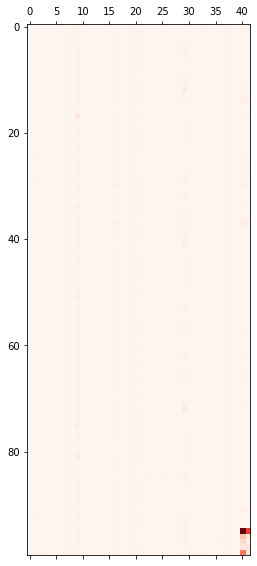

In [51]:
plt.matshow(fit_data, cmap=plt.cm.Reds)


Text(0.5, 1.0, 'structure of rearranged data')

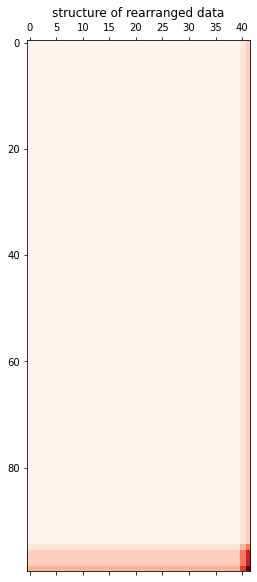

In [54]:
plt.matshow(
    np.outer(np.sort(model_bi.row_labels_) + 1, np.sort(model_bi.column_labels_) + 1),
    cmap=plt.cm.Reds,
)
plt.title("structure of rearranged data")